# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [52]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [53]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [54]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [55]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [56]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [58]:
#宣告採用序列模型
model = Sequential()

In [59]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=128, 
                input_dim=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dropout(0.2))

In [60]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [61]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [62]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [63]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.3010 - acc: 0.9115 - val_loss: 0.1208 - val_acc: 0.9633
Epoch 2/10
48000/48000 [==============================] - 13s 261us/step - loss: 0.1310 - acc: 0.9609 - val_loss: 0.0949 - val_acc: 0.9722
Epoch 3/10
48000/48000 [==============================] - 11s 239us/step - loss: 0.0973 - acc: 0.9705 - val_loss: 0.0933 - val_acc: 0.9734
Epoch 4/10
48000/48000 [==============================] - 12s 247us/step - loss: 0.0786 - acc: 0.9757 - val_loss: 0.0873 - val_acc: 0.9742
Epoch 5/10
48000/48000 [==============================] - 12s 249us/step - loss: 0.0659 - acc: 0.9787 - val_loss: 0.0879 - val_acc: 0.9749
Epoch 6/10
48000/48000 [==============================] - 12s 241us/step - loss: 0.0604 - acc: 0.9816 - val_loss: 0.0799 - val_acc: 0.9776
Epoch 7/10
48000/48000 [==============================] - 12s 250us/step - loss: 0.0510 - acc: 0.9836 - val_loss: 0.

# 以圖形顯示訓練過程

In [64]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

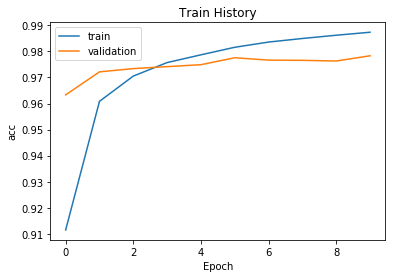

In [65]:
show_train_history(train_history,'acc','val_acc')

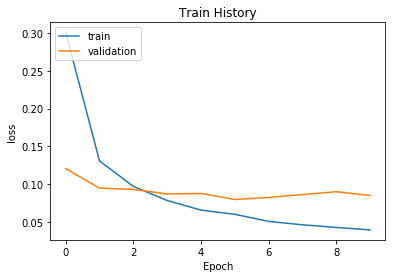

In [66]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [67]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 62us/step

accuracy= 0.98
